In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("Breast_Cancer.csv")
#Tumor (T) : How large is the priamry tumor 
#Node (N) : Has the tumor spread to the lymph nodes
#Metastasis (M) : Has the cancer spread to other body parts
#Stage : Regional—Cancer has spread to nearby lymph nodes, tissues, or organs.
#                Distant—Cancer has spread to distant parts of the body.
#Differentiate : how much or how little tumor tissue looks like the normal tissue it came from
#Estrogen : Female hormone
#Progesterone : Female hormone secreted while pregnant
#Regional Node Examined : No of lymph nodes examined
#Reginol Node Postive : No of lymph nodes where cancer exists

In [3]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
df.count()

Age                       4024
Race                      4024
Marital Status            4024
T Stage                   4024
N Stage                   4024
6th Stage                 4024
differentiate             4024
Grade                     4024
A Stage                   4024
Tumor Size                4024
Estrogen Status           4024
Progesterone Status       4024
Regional Node Examined    4024
Reginol Node Positive     4024
Survival Months           4024
Status                    4024
dtype: int64

In [5]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [6]:
df.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [7]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [8]:
df.count()

Age                       4024
Race                      4024
Marital Status            4024
T Stage                   4024
N Stage                   4024
6th Stage                 4024
differentiate             4024
Grade                     4024
A Stage                   4024
Tumor Size                4024
Estrogen Status           4024
Progesterone Status       4024
Regional Node Examined    4024
Reginol Node Positive     4024
Survival Months           4024
Status                    4024
dtype: int64

In [9]:
df.nunique()

Age                        40
Race                        3
Marital Status              5
T Stage                     4
N Stage                     3
6th Stage                   5
differentiate               4
Grade                       4
A Stage                     2
Tumor Size                110
Estrogen Status             2
Progesterone Status         2
Regional Node Examined     54
Reginol Node Positive      38
Survival Months           107
Status                      2
dtype: int64

In [10]:
df['Age'].unique()

array([68, 50, 58, 47, 51, 40, 69, 46, 65, 48, 62, 61, 56, 43, 60, 57, 55,
       63, 66, 53, 59, 54, 49, 64, 42, 37, 67, 31, 52, 33, 45, 38, 39, 36,
       41, 44, 32, 34, 35, 30])

<Axes: >

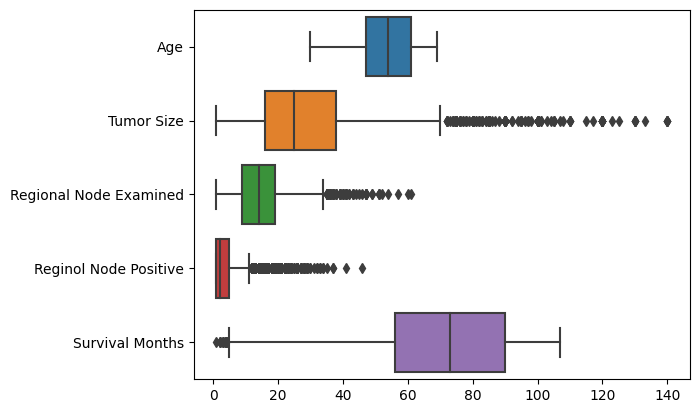

In [11]:
sb.boxplot(data=df, orient="h")

In [12]:
import numpy as np
# Create arrays of Boolean values indicating the outlier rows
Tumor_Size_outliers = np.where(df["Tumor Size"]>55)[0]
Regional_Node_Examined_outliers = np.where(df["Regional Node Examined"]>30)[0]
Reginol_Node_Positive_outliers = np.where(df["Reginol Node Positive"]>10)[0]
Survival_Months_outliers = np.where(df["Survival Months"]<10)[0]
#concatenate & remove duplicate indexes
outliers = np.concatenate((Tumor_Size_outliers, Regional_Node_Examined_outliers, Reginol_Node_Positive_outliers, Survival_Months_outliers), axis=0)
outliers = np.unique(outliers)
#print(outliers)

In [13]:
# Removing the outliers
df.drop(index=outliers, inplace=True)

<BarContainer object of 2 artists>

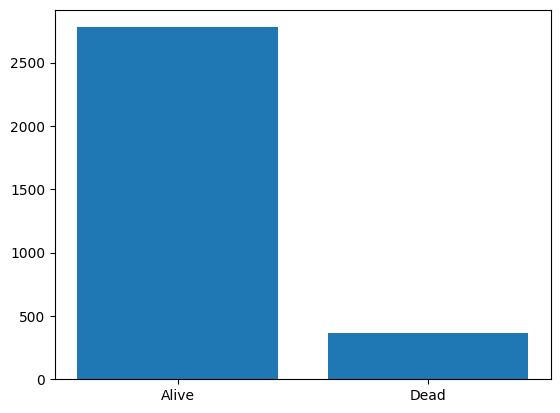

In [14]:
#Class values 
value_counts = df['Status'].value_counts()

plt.bar(value_counts.index, value_counts.values)
#conc : The data is imbalanced

In [15]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000
mean,54.060490,23.875836,12.870423,2.601401,73.278255
std,8.868618,11.715056,6.771904,2.180031,21.057238
min,30.000000,1.000000,1.000000,1.000000,10.000000
25%,47.000000,15.000000,8.000000,1.000000,58.000000
50%,54.000000,21.000000,13.000000,2.000000,74.000000
75%,61.000000,30.000000,17.000000,3.000000,91.000000
max,69.000000,55.000000,30.000000,10.000000,107.000000


/tmp/ipykernel_6349/3438313754.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x=df["Tumor Size"],hist = False,kde_kws={'shade':True},color='red')
/home/mariam/.local/lib/python3.10/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: ylabel='Density'>

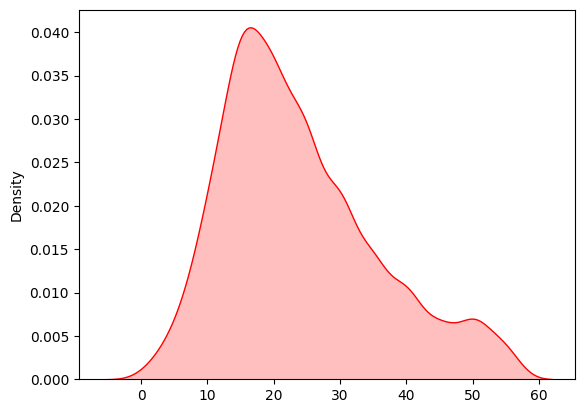

In [16]:
sb.distplot(x=df["Tumor Size"],hist = False,kde_kws={'shade':True},color='red')
#20 mm is the size most common tumor size

(array([ 30.,  70., 166., 289., 486., 451., 447., 418., 424., 360.]),
 array([30. , 33.9, 37.8, 41.7, 45.6, 49.5, 53.4, 57.3, 61.2, 65.1, 69. ]),
 <BarContainer object of 10 artists>)

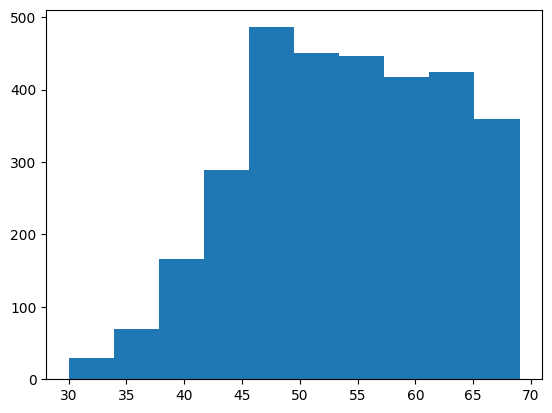

In [17]:
plt.hist(df['Age'],bins = 10)
#Women above 45 tend to have a higher risk of having Cancer 

<Axes: xlabel='Marital Status'>

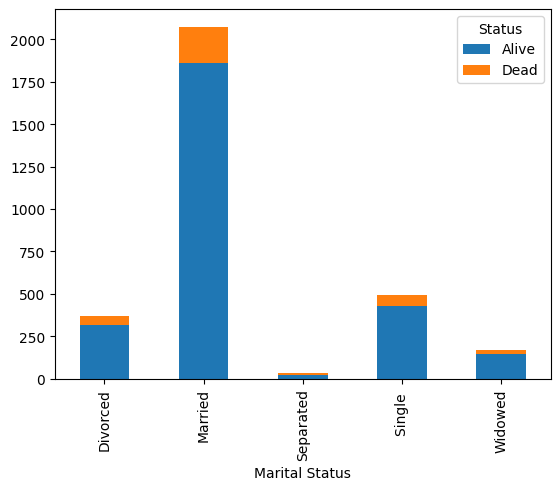

In [18]:
df.groupby(['Marital Status', 'Status']).size().unstack().plot(kind='bar', stacked=True)
#Married Women have the highest percentage of having cancer and also the highest percentage in dying

<Axes: xlabel='Age', ylabel='Survival Months'>

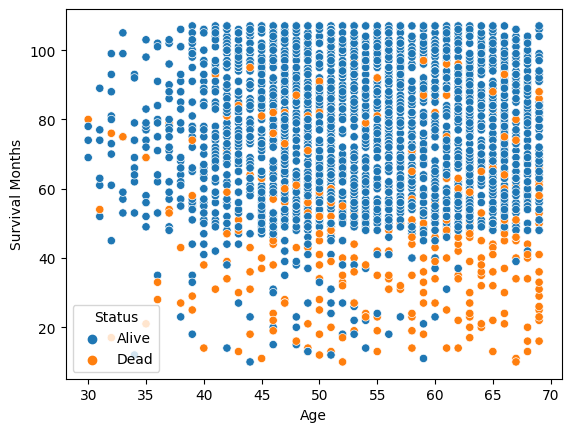

In [19]:
sb.scatterplot(data = df,x="Age",y="Survival Months",hue="Status")
#The older people have a lower chance to survive more months and live
#The people who survived more than 40 months have a higher chance of survival

<Axes: >

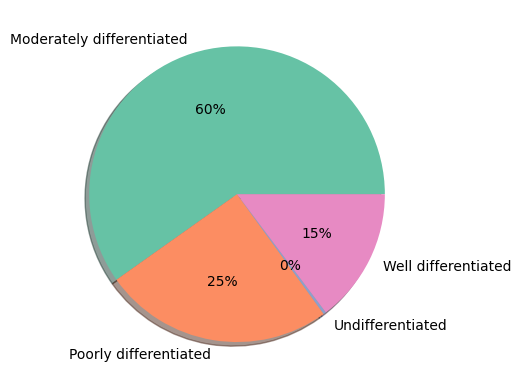

In [20]:
df.groupby(['differentiate']).size().plot(kind='pie',y='Race',autopct='%1.0f%%',shadow=True,colors=sb.color_palette('Set2'))
#The highest percentage of cancerous tissue are the one that are moderately differentiated

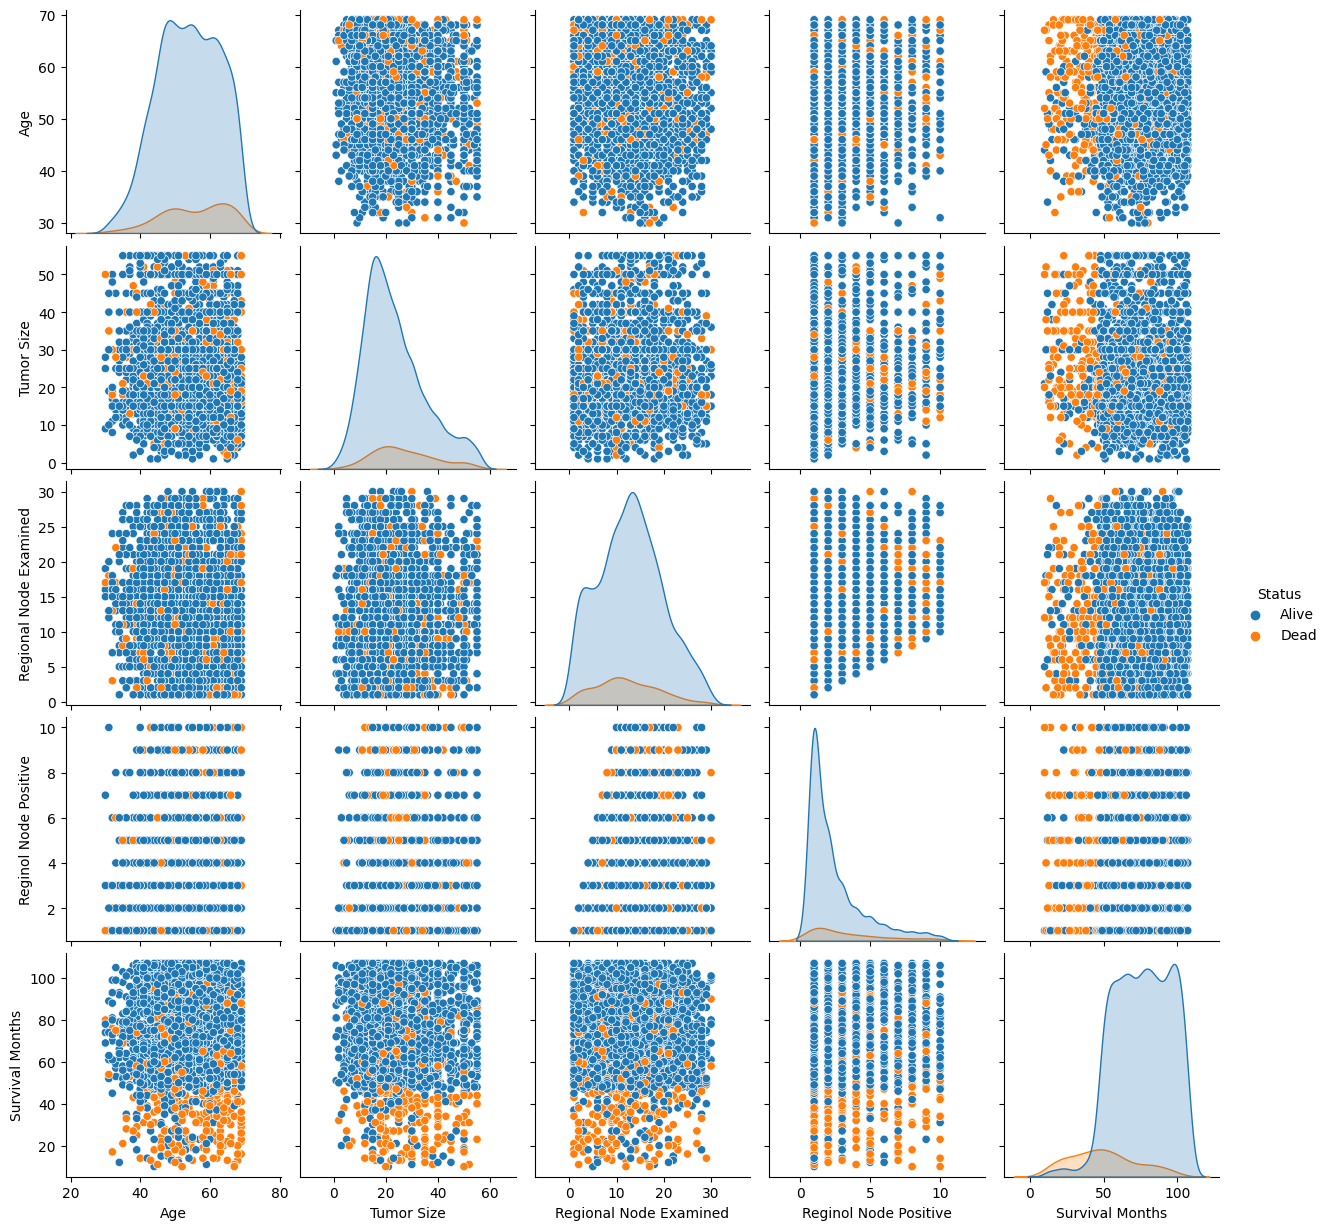

In [21]:
sb.pairplot(df,hue="Status")

In [22]:
age_bins = ['30', '40', '50', '60', '70']
age_labels = [1, 2, 3, 4]
df['Age'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [23]:
for col in df.columns:
    res = df[col].dtypes
    if(res == "object"):
        df[col] = pd.factorize(df[col])[0] + 1

In [24]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,4,1,1,1,1,1,1,1,1,4,1,1,24,1,60,1
1,2,1,1,2,2,2,2,2,1,35,1,1,14,5,62,1
3,3,1,1,1,1,1,1,1,1,18,1,1,2,1,84,1
4,2,1,1,2,1,3,1,1,1,41,1,1,3,1,50,1
5,3,1,2,1,1,1,2,2,1,20,1,1,18,2,89,1


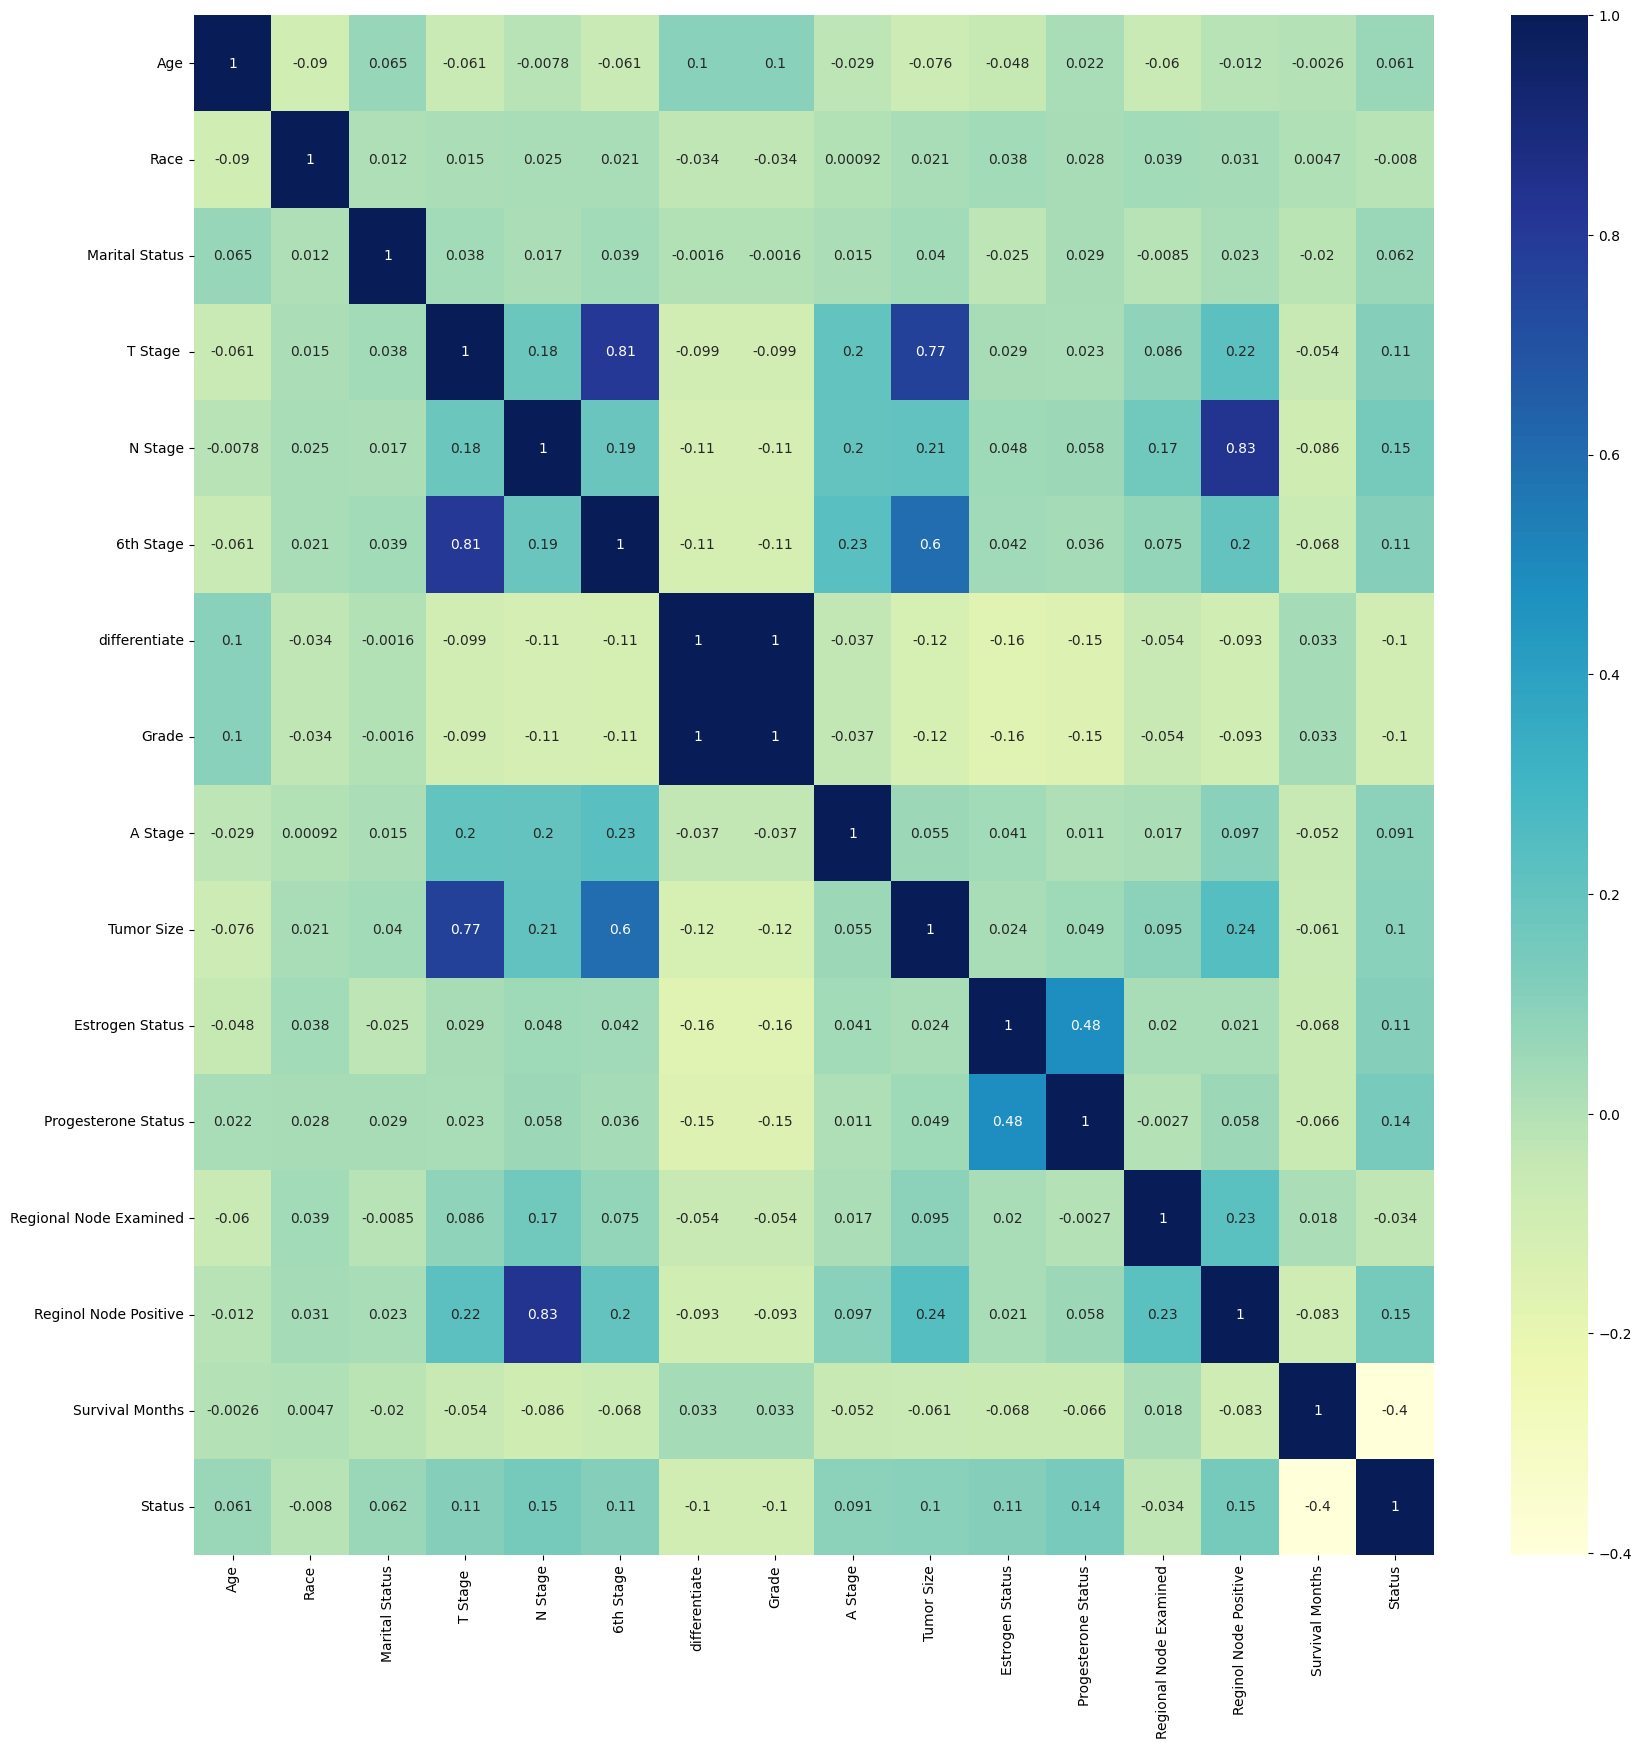

In [25]:
fig, ax = plt.subplots(figsize=(20,20))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
#sb.set(font_scale=2)
plt.show()

In [26]:
df.corr(method='pearson', min_periods=1)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
Age,1.000000,-0.089856,0.065368,-0.061007,-0.007820,-0.060781,0.099872,0.099872,-0.028782,-0.075943,-0.047869,0.021573,-0.060247,-0.011930,-0.002629,0.060838
Race,-0.089856,1.000000,0.011961,0.014730,0.024546,0.020701,-0.034188,-0.034188,0.000920,0.020958,0.038150,0.027556,0.038671,0.031260,0.004674,-0.008040
Marital Status,0.065368,0.011961,1.000000,0.038314,0.017431,0.038945,-0.001570,-0.001570,0.015059,0.039970,-0.024924,0.028590,-0.008464,0.022673,-0.019849,0.061529
T Stage,-0.061007,0.014730,0.038314,1.000000,0.181779,0.805362,-0.099284,-0.099284,0.201443,0.767294,0.029438,0.023445,0.086257,0.220374,-0.054269,0.110686
N Stage,-0.007820,0.024546,0.017431,0.181779,1.000000,0.187549,-0.107909,-0.107909,0.196163,0.206392,0.047589,0.057879,0.166226,0.831633,-0.086212,0.150742
6th Stage,-0.060781,0.020701,0.038945,0.805362,0.187549,1.000000,-0.114039,-0.114039,0.229404,0.599070,0.042222,0.035886,0.074587,0.199084,-0.068481,0.112269
differentiate,0.099872,-0.034188,-0.001570,-0.099284,-0.107909,-0.114039,1.000000,1.000000,-0.037020,-0.119943,-0.163981,-0.154957,-0.053783,-0.093028,0.032655,-0.099838
Grade,0.099872,-0.034188,-0.001570,-0.099284,-0.107909,-0.114039,1.000000,1.000000,-0.037020,-0.119943,-0.163981,-0.154957,-0.053783,-0.093028,0.032655,-0.099838
A Stage,-0.028782,0.000920,0.015059,0.201443,0.196163,0.229404,-0.037020,-0.037020,1.000000,0.055091,0.040725,0.010861,0.016531,0.096924,-0.051726,0.091094
Tumor Size,-0.075943,0.020958,0.039970,0.767294,0.206392,0.599070,-0.119943,-0.119943,0.055091,1.000000,0.023905,0.048827,0.095335,0.242921,-0.060808,0.099840


In [27]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,4,1,1,1,1,1,1,1,1,4,1,1,24,1,60,1
1,2,1,1,2,2,2,2,2,1,35,1,1,14,5,62,1
3,3,1,1,1,1,1,1,1,1,18,1,1,2,1,84,1
4,2,1,1,2,1,3,1,1,1,41,1,1,3,1,50,1
5,3,1,2,1,1,1,2,2,1,20,1,1,18,2,89,1


# Machine Learning Models

In [28]:
#!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

In [29]:
#Preparing Data for Machine learning
y = df['Status']
x = df[['Grade','Tumor Size','Estrogen Status','Reginol Node Positive','Survival Months']]
#OverSampling The Data
over_sampler = RandomOverSampler(random_state=42)
x_res, y_res = over_sampler.fit_resample(x, y)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#splitting Data into testing and training
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.25, random_state=0)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
Model = LogisticRegression()
Model.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_prediction = Model.predict(x_test)

In [34]:
print("accuracy ",accuracy_score(y_test,y_prediction))
print("precision ",precision_score(y_test,y_prediction))
print("recall ",recall_score(y_test,y_prediction))
print("f1 ",f1_score(y_test,y_prediction))

accuracy  0.7510791366906475
precision  0.7403708987161198
recall  0.7598828696925329
f1  0.75


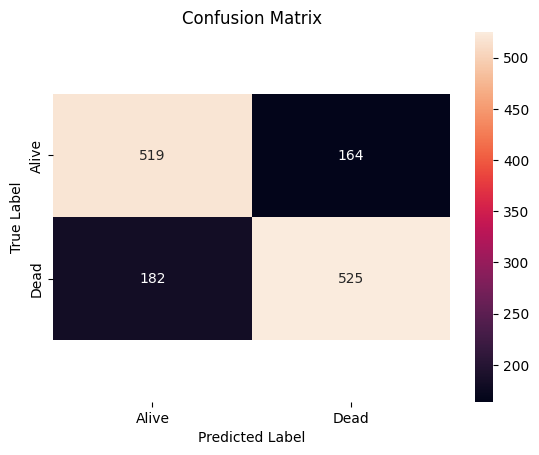

In [35]:
cm = confusion_matrix(y_test, y_prediction)
class_label = ["Alive", "Dead"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sb.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pickle

In [37]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

In [38]:
rf_model = rf.fit(x_train, y_train)

In [39]:
y_pred = rf_model.predict(x_test)

In [40]:
print("accuracy ",accuracy_score(y_test,y_pred))
print("precision ",precision_score(y_test,y_pred))
print("recall ",recall_score(y_test,y_pred))
print("f1 ",f1_score(y_test,y_pred))

accuracy  0.958273381294964
precision  0.9968203497615262
recall  0.91800878477306
f1  0.9557926829268293


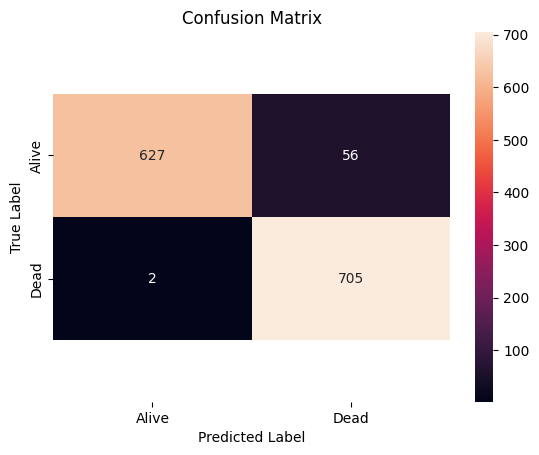

In [41]:
cm = confusion_matrix(y_test,y_pred)
class_label = ["Alive", "Dead"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sb.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [42]:
#make pickle file of our model
pickle.dump(rf,open("RFmodel.pkl","wb"))

# SVM

In [43]:
from sklearn import svm

In [44]:
model = svm.SVC()
model.fit(x_train, y_train)
svm_pred = model.predict(x_test)

In [45]:
print("accuracy ",accuracy_score(y_test, svm_pred))
print("precision ",precision_score(y_test, svm_pred))
print("recall ",recall_score(y_test, svm_pred))
print("f1 ",f1_score(y_test, svm_pred))

accuracy  0.7467625899280576
precision  0.7035670356703567
recall  0.8374816983894583
f1  0.7647058823529411


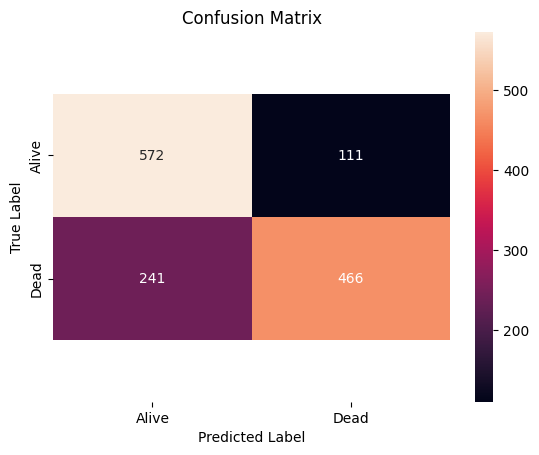

In [46]:
cm = confusion_matrix(y_test, svm_pred)
class_label = ["Alive", "Dead"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sb.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# KNN 

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
k = 5  # Number of nearest neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

In [49]:
print("accuracy ",accuracy_score(y_test,knn_pred))
print("precision ",precision_score(y_test,knn_pred))
print("recall ",recall_score(y_test, knn_pred))
print("f1 ",f1_score(y_test,knn_pred))

accuracy  0.8705035971223022
precision  0.9531531531531532
recall  0.7745241581259151
f1  0.8546042003231019


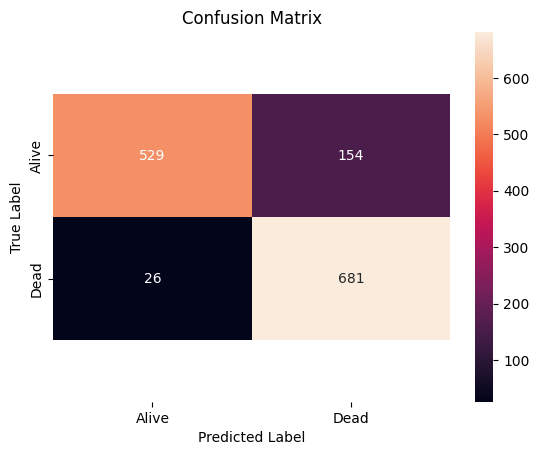

In [50]:
cm = confusion_matrix(y_test,knn_pred)
class_label = ["Alive", "Dead"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sb.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

 # Naive Bayes 

In [51]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
 
# making predictions on the testing set
gnb_pred = gnb.predict(x_test)

In [52]:
print("accuracy ",accuracy_score(y_test,gnb_pred))
print("precision ",precision_score(y_test,gnb_pred))
print("recall ",recall_score(y_test, gnb_pred))
print("f1 ",f1_score(y_test,gnb_pred))

accuracy  0.7136690647482015
precision  0.6752767527675276
recall  0.8038067349926794
f1  0.7339572192513368


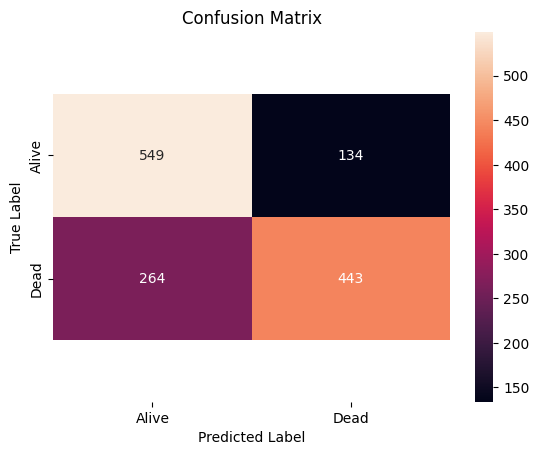

In [53]:
cm = confusion_matrix(y_test,gnb_pred)
class_label = ["Alive", "Dead"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sb.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()